<a href="https://colab.research.google.com/github/Math-Muniz/Cat-Vs-Dogs-Classfication-CNN/blob/main/Cats_Vs_Dogs_Classification_CNN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [79]:
# Imports
import zipfile
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import (Dense, Conv2D, MaxPooling2D, 
                          Flatten, BatchNormalization, Dropout)
import matplotlib.pyplot as plt
import cv2

In [80]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [81]:
# Import the Dataset dogs-vs-cats.zip
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [82]:
# Open the zip file and extract all the files inside
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [83]:
# Generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [84]:
# Normalize
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [85]:
# Create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [86]:
# Consulting the summary of the model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 128)     

In [87]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [88]:
history = model.fit(train_ds, epochs = 10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 58s 91ms/step - loss: 0.6307 - accuracy: 0.6363 - val_loss: 0.5530 - val_accuracy: 0.7174
Epoch 2/10
625/625 [==============================] - 58s 92ms/step - loss: 0.4696 - accuracy: 0.7753 - val_loss: 0.4810 - val_accuracy: 0.7758
Epoch 3/10
625/625 [==============================] - 57s 90ms/step - loss: 0.3543 - accuracy: 0.8407 - val_loss: 0.4421 - val_accuracy: 0.8042
Epoch 4/10
625/625 [==============================] - 57s 90ms/step - loss: 0.2285 - accuracy: 0.9050 - val_loss: 0.5276 - val_accuracy: 0.7836
Epoch 5/10
625/625 [==============================] - 58s 92ms/step - loss: 0.1327 - accuracy: 0.9472 - val_loss: 0.8011 - val_accuracy: 0.7894
Epoch 6/10
625/625 [==============================] - 57s 90ms/step - loss: 0.0924 - accuracy: 0.9658 - val_loss: 0.9460 - val_accuracy: 0.7872
Epoch 7/10
625/625 [==============================] - 57s 90ms/step - loss: 0.0549 - accuracy: 0.9808 - val_loss: 1.1074 - val_accuracy:

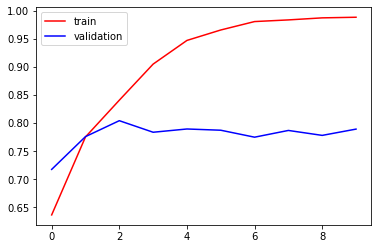

In [89]:
# Checking for discrepancies to see if the model is overfitting
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

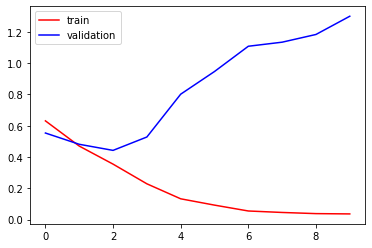

In [90]:
# Checking for discrepancies to see if the model is overfitting
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [91]:
# Ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [92]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [93]:
# Consulting the summary of the model
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_6 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_7 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [94]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [95]:
history = model.fit(train_ds, epochs = 10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 72s 114ms/step - loss: 1.1681 - accuracy: 0.6036 - val_loss: 0.6546 - val_accuracy: 0.6248
Epoch 2/10
625/625 [==============================] - 72s 115ms/step - loss: 0.5734 - accuracy: 0.6748 - val_loss: 0.5834 - val_accuracy: 0.7098
Epoch 3/10
625/625 [==============================] - 72s 114ms/step - loss: 0.5133 - accuracy: 0.7372 - val_loss: 0.5529 - val_accuracy: 0.7368
Epoch 4/10
625/625 [==============================] - 72s 115ms/step - loss: 0.4541 - accuracy: 0.7713 - val_loss: 0.6296 - val_accuracy: 0.7040
Epoch 5/10
625/625 [==============================] - 72s 115ms/step - loss: 0.3965 - accuracy: 0.8030 - val_loss: 0.5134 - val_accuracy: 0.7570
Epoch 6/10
625/625 [==============================] - 72s 115ms/step - loss: 0.3868 - accuracy: 0.8192 - val_loss: 0.6436 - val_accuracy: 0.6822
Epoch 7/10
625/625 [==============================] - 73s 116ms/step - loss: 0.3225 - accuracy: 0.8418 - val_loss: 0.5743 - val_ac

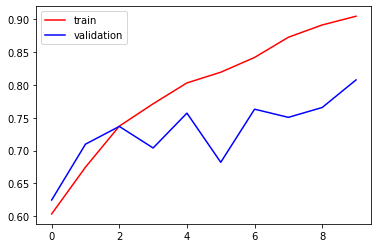

In [96]:
# Checking for discrepancies to see if the model is overfitting
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

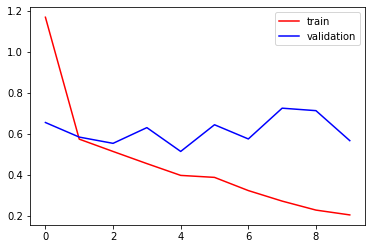

In [97]:
# Checking for discrepancies to see if the model is overfitting
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [98]:
# Download the cat and dog picture in google 

In [99]:
# Now read the cat picture
test_img = cv2.imread('/content/cat.jpg')

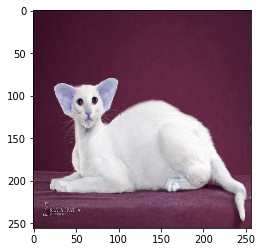

In [113]:
plt.imshow(test_img)

In [114]:
test_img.shape

(256, 256, 3)

In [115]:
test_img = cv2.resize(test_img,(256,256))

In [116]:
# Reshape 1 image
test_input = test_img.reshape((1,256,256,3))

In [117]:
# The answer for dog is 1 and cat is 0
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)

In [105]:
# Now read the dog picture
test_img2 = cv2.imread('/content/dog.jpg')

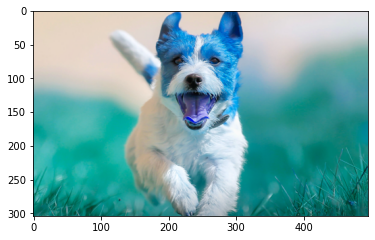

In [106]:
plt.imshow(test_img2)

In [107]:
test_img2 = cv2.resize(test_img2,(256,256))

In [108]:
# Reshape 1 image
test_input2 = test_img2.reshape((1,256,256,3))

In [109]:
# The answer for dog is 1 and cat is 0
model.predict(test_input2)

1/1 [==============================] - 0s 17ms/step


array([[1.]], dtype=float32)

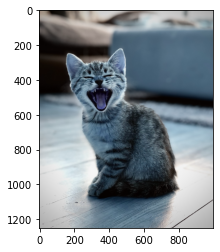

In [118]:
# Now read the other cat picture
test_img3 = cv2.imread('/content/cat2.jpg')
plt.imshow(test_img3)

In [119]:
test_img3 = cv2.resize(test_img3,(256,256))

In [120]:
# Reshape 1 image
test_input3 = test_img3.reshape((1,256,256,3))

In [121]:
# The answer for dog is 1 and cat is 0
model.predict(test_input3)

1/1 [==============================] - 0s 16ms/step


array([[0.]], dtype=float32)

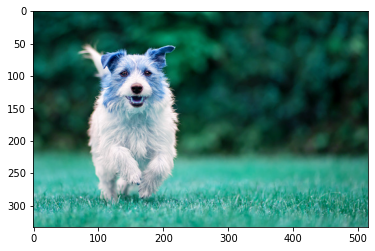

In [122]:
# Now read the other dog picture
test_img4 = cv2.imread('/content/dog2.jpg')
plt.imshow(test_img4)

In [123]:
test_img4 = cv2.resize(test_img4,(256,256))

In [124]:
# Reshape 1 image
test_input4 = test_img4.reshape((1,256,256,3))

In [125]:
# The answer for dog is 1 and cat is 0
model.predict(test_input4)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)